In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

In [2]:
data = np.array(pd.read_csv('marriage.csv',header=None))
datax = data[:,:54]

In [3]:
# Split data into training (80%) and test (20%) sets
x_train, x_test, y_train, y_test = train_test_split(datax, data[:,54], test_size = 0.2)

In [4]:
# K-Nearest Neighbors
KNN = KNeighborsClassifier(5).fit(x_train,y_train)
KNN_score = KNN.score(x_test,y_test)

In [5]:
# Determine optimal number of neighbors for KNN
scores = []
for k in range(1,20):
    avg = []
    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(datax, data[:,54], test_size = 0.2)
        score = KNeighborsClassifier(10).fit(x_train,y_train).score(x_test,y_test)
        avg.append(score)
    scores.append(np.mean(avg))

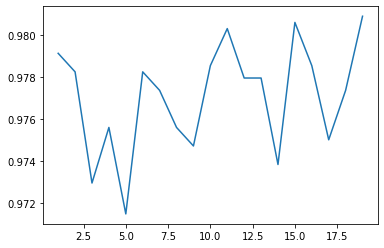

In [6]:
plt.plot(range(1,20), scores) # Best performance at k = 5

In [7]:
# Logistic regression
LR = LogisticRegression(max_iter=200).fit(x_train,y_train)
# Training error
ypred_train = LR.predict(x_train)
matched_train = ypred_train == y_train
acc_train = sum(matched_train)/matched_train.shape[0]
# Test error
ypred_test = LR.predict(x_test)
matched_test = ypred_test == y_test
acc_test = sum(matched_test)/matched_test.shape[0]

LR.score(x_test,y_test)

0.9705882352941176

In [8]:
# Naive Bayes
NB = GaussianNB(var_smoothing=1e-3).fit(x_train,y_train)
NB.score(x_test,y_test)

0.9705882352941176

In [9]:
# Run 1000 iterations with each classifier and record the average score
score_dict = {'KNN':[],'LR':[],'NB':[]}
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(datax, data[:,54], test_size = 0.2)
    # K-Nearest Neighbors
    KNN = KNeighborsClassifier(5).fit(x_train,y_train)
    KNN_score = KNN.score(x_test,y_test)
    score_dict['KNN'].append(KNN_score)
    # Logistic regression
    LR = LogisticRegression(max_iter=200).fit(x_train,y_train)
    LR_score = LR.score(x_test,y_test)
    score_dict['LR'].append(LR_score)
    # Naive Bayes
    NB = GaussianNB(var_smoothing=1e-3).fit(x_train,y_train)
    NB_score = NB.score(x_test,y_test)
    score_dict['NB'].append(NB_score)
    
print('Average Classification Accuracy')
print('K-Nearest Neighbors: {}'.format(np.mean(score_dict['KNN'])))
print('Logistic Regression: {}'.format(np.mean(score_dict['LR'])))
print('Naive Bayes: {}'.format(np.mean(score_dict['NB'])))

Average Classification Accuracy
K-Nearest Neighbors: 0.975529411764706
Logistic Regression: 0.9747058823529412
Naive Bayes: 0.975529411764706


In [10]:
print('Classification Stdev')
print('K-Nearest Neighbors: {}'.format(np.std(score_dict['KNN'])))
print('Logistic Regression: {}'.format(np.std(score_dict['LR'])))
print('Naive Bayes: {}'.format(np.std(score_dict['NB'])))

Classification Stdev
K-Nearest Neighbors: 0.023817646332427757
Logistic Regression: 0.024894239964116268
Naive Bayes: 0.023817646332427757


In [11]:
# Perform PCA and project data to 2 dimensions
m,n = datax.shape
C = np.matmul(datax.T,datax)/m
lambd, v = np.linalg.eig(C)
lambd = lambd.real
v = v.real
v = v[:,:2]

pdata = np.dot(datax, v)

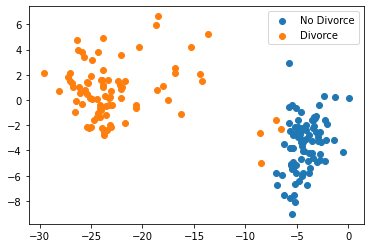

In [12]:
fig, ax = plt.subplots()
ax.scatter(pdata[np.where(data[:,54] == 0),0], pdata[np.where(data[:,54] == 0),1], label='No Divorce')
ax.scatter(pdata[np.where(data[:,54] == 1),0], pdata[np.where(data[:,54] == 1),1], label='Divorce')
plt.legend()
plt.show()

In [13]:
# Repeat the classifications using the reduced dimension data
x_train, x_test, y_train, y_test = train_test_split(pdata, data[:,54], test_size = 0.2)
# K-Nearest Neighbors
KNN = KNeighborsClassifier(5).fit(pdata, data[:,54])
# Logistic regression
LR = LogisticRegression(max_iter=200).fit(pdata, data[:,54])
# Naive Bayes
NB = GaussianNB().fit(pdata, data[:,54])

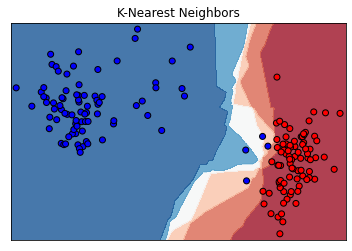

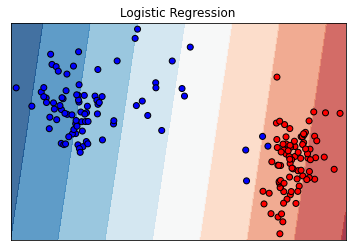

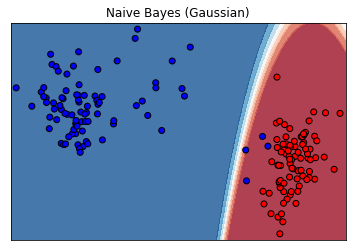

In [14]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundaries for each classifier
h = .02
x_min, x_max = pdata[:, 0].min() - .5, pdata[:, 0].max() + .5
y_min, y_max = pdata[:, 1].min() - .5, pdata[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for i, j in zip([KNeighborsClassifier(5), LogisticRegression(max_iter=200), GaussianNB()], ['K-Nearest Neighbors', 'Logistic Regression', 'Naive Bayes (Gaussian)']):
    fig, ax = plt.subplots()
    clf = i
    clf.fit(pdata, data[:,54])

    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the data points
    ax.scatter(pdata[:, 0], pdata[:, 1], c=data[:,54], cmap=cm_bright, edgecolors='k', marker='o')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(j)